In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('LoanApproval-EDA.csv')
data.head()

,Unnamed: 0,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0,1,2.0,Graduate,No,9600000.0,29900000.0,NaN,778.0,2400000.0,17600000.0,22700000.0,8000000.0,Approved
1,1,2,0.0,Not Graduate,Yes,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,NaN,Rejected
2,2,3,3.0,Graduate,No,9100000.0,29700000.0,20.0,506.0,7100000.0,NaN,33300000.0,12800000.0,Rejected
3,3,4,3.0,Graduate,No,8200000.0,30700000.0,8.0,467.0,NaN,3300000.0,23300000.0,7900000.0,Rejected
4,4,5,5.0,Not Graduate,Yes,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,Rejected


In [4]:
df = data.copy()

In [5]:
categorical = []
numerical = []
for col in df.columns:
    if df[col].dtypes=='O':
        categorical.append(col)
    else:
        numerical.append(col)

# IQR Method 

<Axes: >

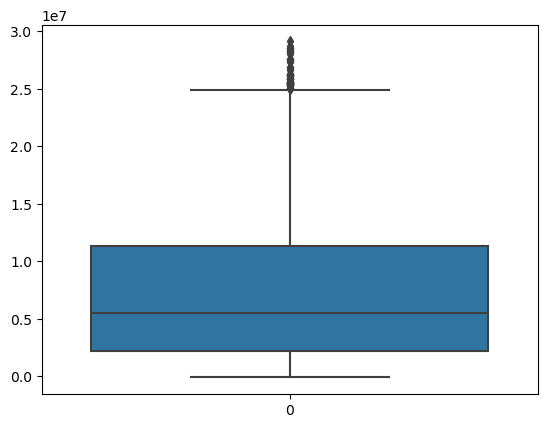

In [6]:
sns.boxplot(df['residential_assets_value'])

In [7]:
q1 = df['residential_assets_value'].quantile(0.25)
q3 = df['residential_assets_value'].quantile(0.75)
iqr = q3-q1

In [8]:
iqr

9100000.0

In [9]:
lowerfence = q1-(1.5*iqr)
uperfence = q3+(1.5*iqr)


# Trimming

In [10]:
df[(df['residential_assets_value']>uperfence) | (df['residential_assets_value']<lowerfence)].shape

(50, 14)

In [11]:
df.shape

(4269, 14)

In [12]:
trimmed_df = df[(df['residential_assets_value']<=uperfence) & (df['residential_assets_value']>=lowerfence)]

In [13]:
trimmed_df['residential_assets_value']

0        2400000.0
1        2700000.0
2        7100000.0
4       12400000.0
6       22500000.0
           ...    
4264     2800000.0
4265     4200000.0
4266     1200000.0
4267     8200000.0
4268    17800000.0
Name: residential_assets_value, Length: 3958, dtype: float64

C:\Users\Anoop Raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anoop Raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='residential_assets_value', ylabel='Density'>

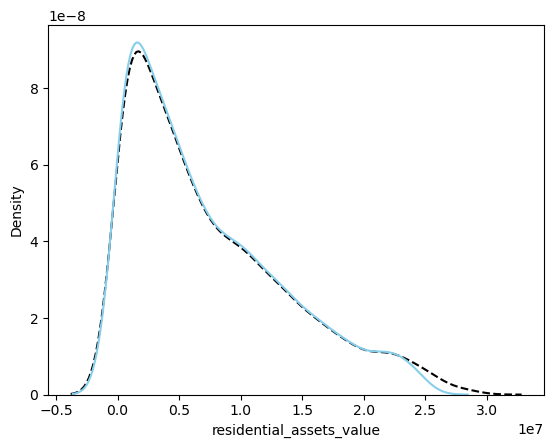

In [14]:
sns.kdeplot(df['residential_assets_value'],color='black',ls='dashed')
sns.kdeplot(trimmed_df['residential_assets_value'],color='skyblue')

<Axes: >

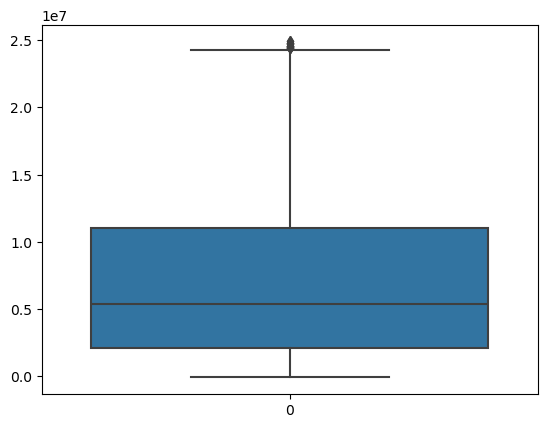

In [15]:
sns.boxplot(trimmed_df['residential_assets_value'])

# Capping

In [16]:
capped_df = np.where(df['residential_assets_value']>uperfence,uperfence,
                    np.where(df['residential_assets_value']<lowerfence,lowerfence,
                            df['residential_assets_value']))

In [17]:
capped_df

array([ 2400000.,  2700000.,  7100000., ...,  1200000.,  8200000.,
       17800000.])

C:\Users\Anoop Raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anoop Raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='residential_assets_value', ylabel='Density'>

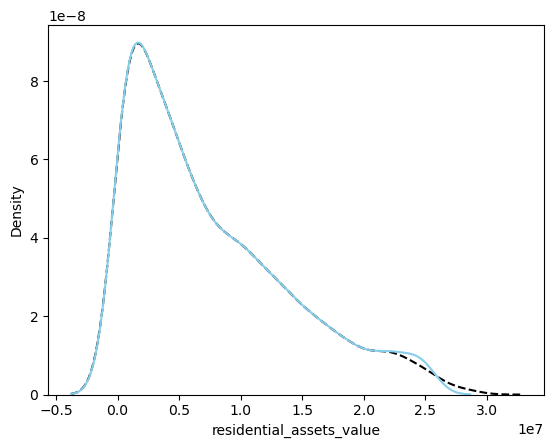

In [19]:
sns.kdeplot(df['residential_assets_value'],color='black',ls='dashed')
sns.kdeplot(capped_df,color='skyblue')

# Percentile Methods 

In [20]:
lowerboundary = df['residential_assets_value'].quantile(0.05)
upperboundary = df['residential_assets_value'].quantile(0.95)

In [21]:
df[(df['residential_assets_value']>upperboundary) | (df['residential_assets_value']<lowerboundary)].shape

(371, 14)

# Trimming

In [24]:
trimmed_df = df[(df['residential_assets_value']<=upperboundary) & (df['residential_assets_value']>=lowerboundary)] 

C:\Users\Anoop Raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anoop Raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='residential_assets_value', ylabel='Density'>

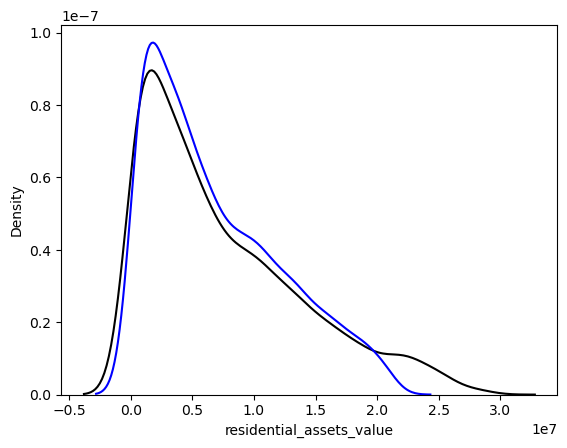

In [25]:
sns.kdeplot(df['residential_assets_value'],color='black')
sns.kdeplot(trimmed_df['residential_assets_value'],color='blue')

# Capping

In [26]:
capped_df = np.where(df['residential_assets_value']>upperboundary,upperboundary,
                    np.where(df['residential_assets_value']<lowerboundary,lowerboundary,
                            df['residential_assets_value']))

C:\Users\Anoop Raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anoop Raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='residential_assets_value', ylabel='Density'>

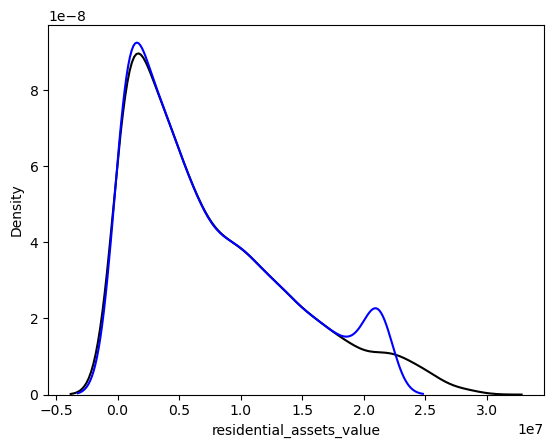

In [27]:
sns.kdeplot(df['residential_assets_value'],color='black')
sns.kdeplot(capped_df,color='blue')

# Power Transformation 

C:\Users\Anoop Raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='residential_assets_value', ylabel='Density'>

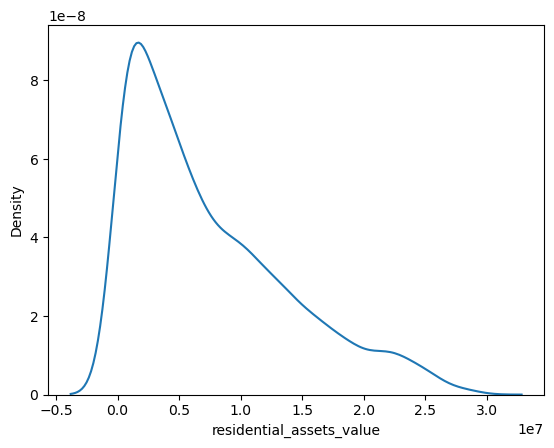

In [28]:
sns.kdeplot(df['residential_assets_value'])

In [31]:
df['rav_log'] = np.log1p(df['residential_assets_value'])

C:\Users\Anoop Raj\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\Anoop Raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rav_log', ylabel='Density'>

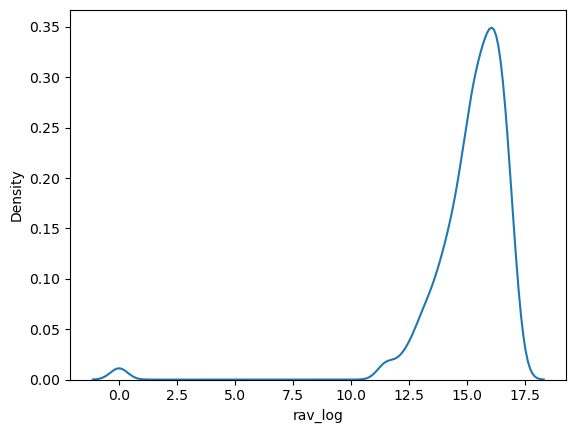

In [32]:
sns.kdeplot(df['rav_log'])

<Axes: >

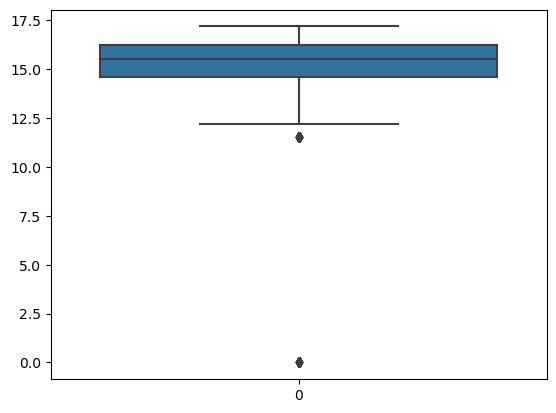

In [33]:
sns.boxplot(df['rav_log'])

In [34]:
df['rav_sq'] = np.square(df['residential_assets_value'])

C:\Users\Anoop Raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rav_sq', ylabel='Density'>

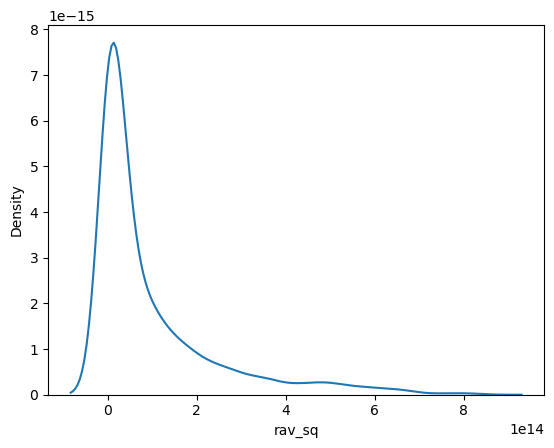

In [35]:
sns.kdeplot(df['rav_sq'])

In [39]:
# pip install scikit-learn

In [42]:
from sklearn.preprocessing import PowerTransformer 

In [43]:
pt = PowerTransformer()

In [44]:
df['rav_pt'] = pt.fit_transform(df[['residential_assets_value']])

C:\Users\Anoop Raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rav_pt', ylabel='Density'>

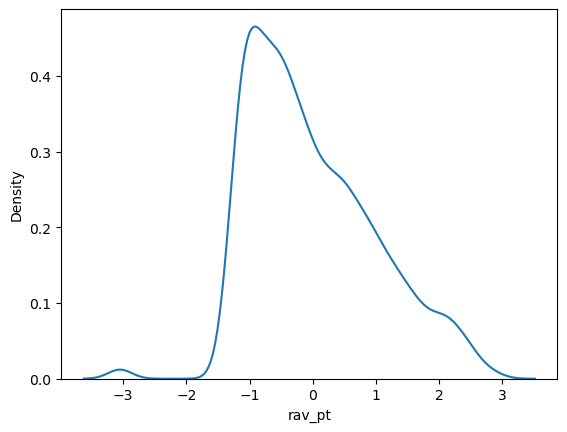

In [45]:
sns.kdeplot(df['rav_pt'])

<Axes: >

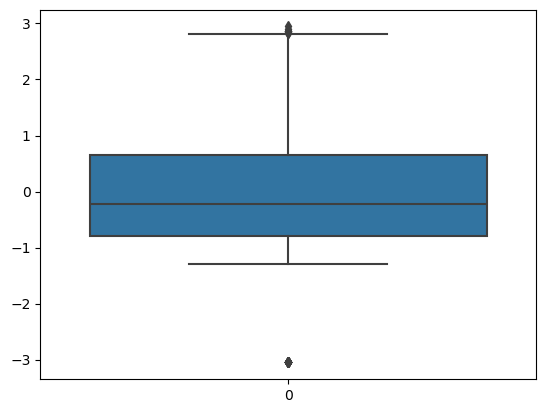

In [46]:
sns.boxplot(df['rav_pt'])